In [20]:
from tool.functions import *
from tool.evaluation import *

In [2]:
%time download_all_bidixes()

2018-07-12 10:41:20,467 | INFO : Start
2018-07-12 10:52:31,314 | INFO : Finish
Wall time: 11min 12s


In [3]:
rename = {'epo-bul':'bul-epo', 'epo-pes':'pes-epo', 'epo-pol':'pol-epo', 'epo-bel':'bel-epo','epo-bre':'bre-epo',
          'epo-ces':'ces-epo','epo-deu':'deu-epo', 'epo-ell':'ell-epo','epo-fin':'fin-epo','spa-qve':'qve-spa',
          'hun-eng':'eng-hun'}

for root, dirs, files in os.walk ('./dictionaries/'):
    for fl in files :
        nm = fl.replace('.dix','')
        if nm in rename:
            try:
                os.rename (root+'/'+fl, root+'/'+rename[nm]+'.dix')
            except:
                print (fl)

remove = ['ces-ces.dix','ita-ita.dix', 'eus-eu_bis.dix','hbs_HR-hbs_SR.dix','zh_CN-zh_TW.dix']
for i in remove:
    os.remove('./dictionaries/'+i)

In [14]:
def fix_bi_dictionaries():
    from tool.data import rename, remove
    for root, dirs, files in os.walk ('./dictionaries/'):
        for fl in files :
            nm = fl.replace('.dix','')
            if nm in rename:
                try:
                    os.rename (root+'/'+fl, root+'/'+rename[nm]+'.dix')
                except:
                    pass
    for i in remove:
        try:
            os.remove('./dictionaries/'+i)
        except:
            pass

In [15]:
fix_bi_dictionaries()

In [ ]:
for root, dirs, files in os.walk ('./dictionaries/'):
    for fl in files :
        pair = fl.replace('.dix','').split('-')
        if 
        try:
            tree = ET.parse(root+'/'+fl)
            for section in tree.findall('section'):
                vr = section.findall(".//*[@vr]")
                if vr: print ('vr\t', fl, len(vr))
                vl = section.findall(".//*[@vl]")
                if vl: print ('vl\t', fl, len(vl))
        except:
            print ('error:\t',fl)

In [5]:
%time monodix()

2018-07-12 11:09:22,634 | INFO : started
2018-07-12 11:12:53,886 | INFO : finished
Wall time: 3min 31s


In [6]:
%time preprocessing()


Wall time: 1h 30min 2s


In [ ]:
for root, dirs, files in os.walk ('./dictionaries/'):
    for fl in files :
        try:
            tree = ET.parse(root+'/'+fl)
            for section in tree.findall('section'):
                vr = section.findall(".//*[@vr]")
                if vr: print ('vr\t', fl, len(vr))
                vl = section.findall(".//*[@vl]")
                if vl: print ('vl\t', fl, len(vl))
        except:
            print ('error:\t',fl)

In [1]:
import os
import xml.etree.ElementTree as ET

In [45]:
ET.parse('C:/Users/Glaz/Documents/GitHub/apertium-sah-eng/apertium-sah-eng.sah-eng.dix')

In [13]:
for root, dirs, files in os.walk ('./dictionaries/'):
    for fl in files :
        try:
            tree = ET.parse(root+'/'+fl)
            for section in tree.findall('section'):
                vr = section.findall(".//*[@vr]")
                if vr: print ('vr\t', fl, len(vr))
                vl = section.findall(".//*[@vl]")
                if vl: print ('vl\t', fl, len(vl))
        except:
            print ('error:\t',fl)

vr	 arg-cat.dix 6
vr	 dan-nor.dix 9944
vr	 eng-cat.dix 495
vl	 eng-cat.dix 80
error:	 epo-bul.dix
error:	 epo-fas.dix
error:	 epo-pol.dix
vr	 fao-nor.dix 2254
error:	 fin-fra.dix
vr	 fra-cat.dix 3
vr	 fra-por.dix 550
vr	 ita-nor.dix 696
vl	 nor-eng.dix 140
error:	 pol-lav.dix
error:	 sah-eng.dix
vr	 spa-cat.dix 997
vr	 swe-nor.dix 7394
vr	 swe-nor.dix 9350


In [1]:
variants = {'nor':{'nno':'nno','nob':'nob'}, 
            'cat':{'val':'val', 'cat':'cat_cat'}, 
            'por':{'pt':'por_pt', 'br':'por_br'},
            'eng':{'en_GB':'eng_GB','en_US':'eng_US'}
           }

In [2]:
def separate_dictionaries(root, filename):
    global variants
    pair = filename.replace('.dix','').split('-')
    tree = ET.parse(root+'/'+filename)
    no, left, right, both = ET.Element('section'), ET.Element('section'), ET.Element('section'), ET.Element('section')
    for section in tree.findall('section'):
        vr = section.findall(".//*[@vr]")
        for i in vr:
            if 'vl' in i.attrib:
                both.append(i)
            else:
                right.append(i)
        vl = section.findall(".//*[@vl]")
        for i in vl:
            if 'vr' not in i.attrib:
                left.append(i)
        if 
                    
        

SyntaxError: invalid syntax (<ipython-input-2-fc0df6561f45>, line 4)

In [19]:
for root, dirs, files in os.walk ('./dictionaries/'):
    for fl in files :
        try:
            tree = ET.parse(root+'/'+fl)
            for section in tree.findall('section'):
                vr = section.findall(".//*[@vr]")
                for i in vr:
                    if 'vl' in i.attrib:
                        print ('!')
        except:
            print ('error:\t',fl)

!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
!
error:	 epo-bul.dix
error:	 epo-fas.dix
error:	 epo-pol.dix
error:	 fin-fra.dix
error:	 pol-lav.dix
error:	 sah-eng.dix


# Filter

In [9]:
def filter_results(result, cutoff=4):
    mean = 0
    for i in result:
        mean += i[1]
    if len(result) < 20: mean += (20-len(result))*exp(-cutoff-1)
    mean = mean / 20
    return [i for i in result if i[1]>mean]

In [5]:
lang1, lang2 = 'eng','spa'
n = 10

%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))
%time G = built_from_file('{}-{}'.format(lang1,lang2))
%time l1, l2 = dictionaries(lang1, lang2)

In [15]:
def print_lemma_results2(results, n=20):
    for i in results:
        print ('\t\t', i)
        words = filter_results(sorting(results[i], n))
        for j in words:
            print ('{}\t{}'.format(j[0], j[1]))
        print()

In [16]:
%time print_lemma_results(lemma_search (G, 'star', l1, 'spa', 4, 40), n = 20)

		 eng$star$[n_n-ND]
spa$estrella$[n-f_n_n-f-sg]	2.1957739681949104
spa$estelo$[n-m]	0.2712844579026809
spa$lucero$[n-m_n]	0.2712844579026809
spa$astro$[n_n-m]	0.19526883880421858
spa$estrella$[n-f-ND]	0.1470598691371015
spa$cometa$[n-f_n-f-sg]	0.052005373884161515
spa$cometa$[n-m_n]	0.04526742688507605
spa$sol$[n-m_n_n-m-ND]	0.006737946999085467
spa$barrilete$[n-m_n]	0.006737946999085467
spa$pata$[n-f_n_n-f-ND]	0.006737946999085467

		 eng$star$[adj]
spa$estelar$[adj_adj-mf]	0.1268460281398451
spa$estupendo$[adj-GD_adj-GD-ND]	0.006737946999085467
spa$magnífico$[adj_adj-GD-ND_adj-GD]	0.006737946999085467

		 eng$star$[vblex]
spa$protagonizar$[vblex]	0.4821836326607207
spa$jugar$[vblex_vblex-vbact]	0.2840371146351084
spa$presentar$[vblex]	0.11074869476740849
spa$constar$[vblex]	0.09727280076923756
spa$tocar$[vblex]	0.0404276819945128
spa$actuar$[vblex]	0.0404276819945128
spa$tener$[vblex_vblex-pis]	0.0202138409972564
spa$obrar$[vblex]	0.0202138409972564
spa$hacer$[vblex_vblex-inf]	0.020

In [20]:
%time print_lemma_results2(lemma_search (G, 'star', l1, 'spa', 4, 40), n = 20)

		 eng$star$[n_n-ND]
spa$estrella$[n-f_n_n-f-sg]	2.1957739681949104
spa$estelo$[n-m]	0.2712844579026809
spa$lucero$[n-m_n]	0.2712844579026809
spa$astro$[n_n-m]	0.19526883880421858

		 eng$star$[adj]
spa$estelar$[adj_adj-mf]	0.1268460281398451

		 eng$star$[vblex]
spa$protagonizar$[vblex]	0.4821836326607207
spa$jugar$[vblex_vblex-vbact]	0.2840371146351084
spa$presentar$[vblex]	0.11074869476740849
spa$constar$[vblex]	0.09727280076923756

Wall time: 256 ms


In [ ]:
%time print_lemma_results(lemma_search (G, 'star', l1, 'spa', 4, 40), n = 10)

In [10]:
def generate_example(l1, G, lang2):
    for i in l1:
        if i in G:
            ne = list(G.neighbors(i))
            s = FilteredList(ne).lang(lang2)
            if len(s) == 0:
                candidates = possible_translations(G, i, lang2, cutoff=4, n=10)
                result = evaluation(G, i, candidates, mode = 'exp', cutoff=4)
                result = filter_results(sorting(result, 10))
                #result = sorting(result, 10)
                if result:
                    yield i, result

def example(lang1, lang2, n=20):
    n = int(n)
    G = built_from_file('{}-{}'.format(lang1,lang2))
    l1, l2 = dictionaries(lang1, lang2)
    for i, result in islice(generate_example(l1, G, lang2), n):
        print (i)
        for r in result:
            print ('\t', r[0], '\t', r[1])

In [12]:
lang1, lang2 = 'fra','rus'
n = 10

%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))

Wall time: 1.09 s
Wall time: 762 ms


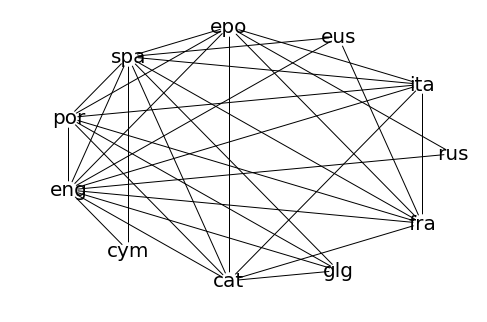

In [14]:
check_graph(lang1, lang2, n=10)

In [15]:
example(lang1, lang2, n=200)

fra$violence$[n_n-f_n-f-ND]
	 rus$насилие$[n-nt-nn_n_n-nt_n-nt-nn-sg] 	 0.19232729602217757
fra$concordat$[n-m]
	 rus$конкордат$[n-m-nn_n] 	 0.049787068367863944
fra$embaumeur$[n]
	 rus$бальзамировщик$[n_n-m-aa] 	 0.049787068367863944
fra$cacao$[n-m]
	 rus$какао$[n_n-nt-nn] 	 0.08157860125476905
	 rus$какао-бобы$[n] 	 0.08157860125476905
	 rus$шоколад$[n-m-nn_n] 	 0.08157860125476905
fra$oignon$[n-m_n_n-m-ND]
	 rus$лук$[n-m-nn_n_n-m] 	 0.17885140202400662
fra$haricot$[n-m_n-m-ND]
	 rus$фасоль$[n-f-nn_n] 	 0.13358397513893056
	 rus$боб$[n-m-nn_n] 	 0.05874332088324698
fra$syndicat$[n_n-m_n-m-ND]
	 rus$профсоюз$[n-m-nn_n_n-m] 	 0.1470598691371015
	 rus$синдикат$[n-m-nn_n] 	 0.1470598691371015
	 rus$объединение$[n-nt-nn_n] 	 0.052005373884161515
	 rus$союз$[n-m-nn_n_n-m] 	 0.052005373884161515
	 rus$уния$[n-f-nn_n] 	 0.052005373884161515
fra$catamaran$[n-m]
	 rus$катамаран$[n_n-m-nn] 	 0.049787068367863944
fra$alcali$[n-m]
	 rus$щёлочь$[n_n-f-nn] 	 0.049787068367863944
fra$fayot$[n-m]
	 r

	 rus$довод$[n-m-nn_n] 	 0.19232729602217757
	 rus$неизвестная$[n] 	 0.19232729602217757
	 rus$неопределённая$[n] 	 0.19232729602217757
	 rus$операнд$[n_n-m-nn] 	 0.19232729602217757
fra$douce-amère$[n-f]
	 rus$паслён сладко-горький$[n] 	 0.049787068367863944
fra$juste$[adv]
	 rus$только$[adv] 	 0.04716562899359827
fra$schiste$[n-m]
	 rus$сланец$[n-m-nn_n] 	 0.06326296236603487
	 rus$шифер$[n-m-nn_n] 	 0.06326296236603487
fra$cocasserie$[n-f]
	 rus$забавность$[n-f-nn_n] 	 0.049787068367863944
	 rus$комизм$[n-m-nn_n] 	 0.049787068367863944
	 rus$комичность$[n] 	 0.049787068367863944
fra$animateur$[n_n-m]
	 rus$докладчик$[n-m-aa_n] 	 0.07000090936512035
	 rus$лектор$[n-m-aa_n] 	 0.07000090936512035
	 rus$диктор$[n-m-aa_n] 	 0.06326296236603487
	 rus$представитель$[n-m-aa_n_n-m] 	 0.06326296236603487
fra$fédération$[n-f_n_n-f-ND]
	 rus$федерация$[n-f-nn_n_n-f] 	 0.5406707136968396
fra$partie fractionnaire$[n-f]
	 rus$дробная часть$[n] 	 0.049787068367863944
fra$pivot$[n-m_n]
	 rus$цапфа$[

In [17]:
lang1, lang2 = 'eng','rus'
n = 10

%time load_file(lang1, lang2, n=n)
%time change_encoding('{}-{}'.format(lang1,lang2))

Wall time: 497 ms
Wall time: 812 ms


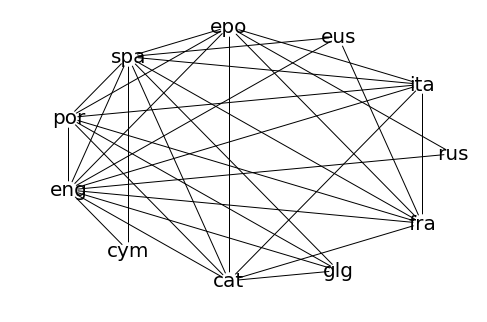

In [18]:
check_graph(lang1, lang2, n=10)

In [19]:
example(lang1, lang2, n=200)

eng$participation$[n_n-ND]
	 rus$интерес$[n-m-nn_n-m_n] 	 0.013475893998170934
eng$late$[adj-sint_adj]
	 rus$последний$[adj_adj-sint] 	 0.04526742688507605
eng$trespass$[vblex]
	 rus$идти$[vblex-imperf] 	 0.04526742688507605
	 rus$сделать$[vblex-perf-tv_vblex-perf] 	 0.013475893998170934
eng$esophagus$[n]
	 rus$пищевод$[n-m-nn_n] 	 0.06326296236603487
eng$sarcasm$[n]
	 rus$сарказм$[n-m-nn_n] 	 0.12906433365614267
eng$marchioness$[n_n-ND]
	 rus$маркграф$[n_n-m-aa] 	 0.08379690677106663
	 rus$маркиз$[n-m-aa_n] 	 0.08379690677106663
eng$emulsion$[n]
	 rus$эмульсия$[n-f-nn_n] 	 0.05684511877472476
eng$alloy$[n_n-sg]
	 rus$сплав$[n] 	 0.17211345502492115
	 rus$лига$[n-f-nn_n] 	 0.0404276819945128
	 rus$связь$[n-f-nn_n_n-f] 	 0.026951787996341868
	 rus$химическая связь$[n] 	 0.026951787996341868
	 rus$союз$[n-m-nn_n_n-m] 	 0.026951787996341868
eng$stake$[n_n-ND]
	 rus$заклад$[n-m-nn_n] 	 0.0905348537701521
	 rus$пари$[n-nt-nn_n] 	 0.0905348537701521
	 rus$ставка$[n-f-nn_n] 	 0.09053485377015

	 rus$электронная лампа$[n] 	 0.13358397513893058
	 rus$заслонка$[n_n-f-nn] 	 0.07221921488141791
eng$jellyfish$[n]
	 rus$медуза$[n-f-aa_n] 	 0.06358306577381023
eng$sabre$[n_n-ND]
	 rus$сабля$[n-f-nn_n] 	 0.09727280076923756
	 rus$меч$[n-m-nn_n_n-m] 	 0.013475893998170934
eng$rear-view mirror$[n]
	 rus$зеркало заднего вида$[n] 	 0.025053585887819647
eng$run$[n_n-ND]
	 rus$карьера$[n-f-nn_n] 	 0.41983939529033654
	 rus$бег$[n-m-nn_n-m-nn-sg_n] 	 0.18074960413252883
	 rus$бег наперегонки$[n] 	 0.07895716188050339
	 rus$забег$[n-m-nn_n] 	 0.07895716188050339
	 rus$состязание в беге$[n] 	 0.07895716188050339
eng$fitness$[n_n-unc]
	 rus$здоровье$[n-nt-nn_n_n-nt_n-nt-nn-sg] 	 0.09727280076923756
eng$guillotine$[n_n-sg]
	 rus$гильотина$[n-f-nn_n] 	 0.11337013414167418
eng$pet$[n]
	 rus$тварь$[n-f-aa_n] 	 0.13580228065522815
	 rus$животное$[n-nt-aa_n_n-nt] 	 0.07895716188050339
	 rus$зверь$[n-m-aa_n] 	 0.07895716188050339
eng$intellect$[n_n-sg]
	 rus$разум$[n-m-nn_n] 	 0.13358397513893058
	 r

In [26]:
lang_c
def copy_local():
    global lang_codes
    with open ('./files/lang_codes.json', 'r') as f: lang_codes = json.load(f)   
    logging.info('Start')
    if not os.path.exists('./dictionaries2/'): os.makedirs('./dictionaries2/')
    with open ('dictionaries.txt','r') as inp:
        for line in inp:
            pair = [l(i) for i in line.replace('.dix','').split('.')[-1].split('-')]
            print (pair)
            
    
    #for repo_name in repo_names(user):
    #    bidix = bidix_url(github.get_repo(user.name+'/'+repo_name))
    #    langs = [l(i) for i in repo_name.split('-')[1:]]
    #    filename = './dictionaries/'+'-'.join(langs)+'.dix'
    #    if bidix:
    #        response = requests.get(bidix)
    #        response.encoding = 'UTF-8'
    #        with open(filename, 'w', encoding='UTF-8') as f: f.write(response.text)
    #logging.info('Finish')    

In [1]:
from tool.functions import *
from tool.evaluation import *
copy_local()

2018-07-13 18:11:12,974 | INFO : Start


NameError: name 'pair' is not defined